In [136]:
import pandas as pd
import gzip
import json
import ast
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

### **Exploracion** 

En esta primera etapa, se abren los datasets y se examinan sus columnas para determinar que columnas seran necesarias para cada una de las funciones a desarrollar, tambien se armará un diccionario de datos para tener una mejor comprension de los mismos.

### *Data Set: Steam_Game*

In [2]:
# Lee linea por linea el archivo steam_games y lo almacena en una lista
ruta= '../DataSets/steam_games.json.gz'
steam_list=[] # lista de dattos

with gzip.open(ruta,'rt',encoding='utf-8') as archivo:
    for fila in archivo:
        datos=json.loads(fila)
        steam_list.append(datos)

# Crear una DataFrame de pandas a partir de la lista de diccionarios steam_list
steam_games=pd.DataFrame(steam_list)
steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


In [3]:
# Desanidamos columna "genres"
steam_games=steam_games.explode('genres').reset_index(drop=True)
steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163142,Laush Studio,Racing,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
163143,Laush Studio,Simulation,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
163144,SIXNAILS,Casual,EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"
163145,SIXNAILS,Indie,EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


### *DataSet: user_reviews*

In [4]:
# Lee el archivo Json linea por linea y devuelve una lista de diccionarios
ruta='../DataSets/user_reviews.json.gz'
reviews_list=[] # lista donde se almacenan los datos 

with gzip.open(ruta,'rt',encoding='utf-8') as archivo:
    for fila in archivo.readlines():
        datos=ast.literal_eval(fila)
        reviews_list.append(datos)


# Crea un DataFrame a partir de la lista de diccionarios obtenidas en el bloque de codigo anterior
user_reviews=pd.DataFrame(reviews_list)
user_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [5]:
# Ver el contenido de cada campo de la columna "reviews"
user_reviews['reviews'][0]

[{'funny': '',
  'posted': 'Posted November 5, 2011.',
  'last_edited': '',
  'item_id': '1250',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'},
 {'funny': '',
  'posted': 'Posted July 15, 2011.',
  'last_edited': '',
  'item_id': '22200',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': "It's unique and worth a playthrough."},
 {'funny': '',
  'posted': 'Posted April 21, 2011.',
  'last_edited': '',
  'item_id': '43110',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}]

In [6]:
# Desanidamos las filas 
user_reviews=user_reviews.explode('reviews').reset_index(drop=True)
user_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted November 5, 20..."
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted July 15, 2011...."
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted April 21, 2011..."
3,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted June 24, 2014...."
4,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted September 8, 2..."
...,...,...,...
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"{'funny': '', 'posted': 'Posted July 10.', 'la..."
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"{'funny': '', 'posted': 'Posted July 8.', 'las..."
59330,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"{'funny': '1 person found this review funny', ..."
59331,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"{'funny': '', 'posted': 'Posted July 20.', 'la..."


In [7]:
# Normaliza columna "reviews" , desanidamos columnas 
datos_normalizados=pd.json_normalize(user_reviews['reviews'])
datos_normalizados


,funny,posted,last_edited,item_id,helpful,recommend,review
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...
59328,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59329,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59330,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59331,,Posted July 20.,,730,No ratings yet,True,:D


In [8]:
# concatena el DataFrame con los datos normalizados 
user_reviews=pd.concat([user_reviews,datos_normalizados],axis=1)
user_reviews

,user_id,user_url,reviews,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted November 5, 20...",,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted July 15, 2011....",,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted April 21, 2011...",,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted June 24, 2014....",,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted September 8, 2...",,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...,...,...
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"{'funny': '', 'posted': 'Posted July 10.', 'la...",,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"{'funny': '', 'posted': 'Posted July 8.', 'las...",,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59330,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"{'funny': '1 person found this review funny', ...",1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59331,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"{'funny': '', 'posted': 'Posted July 20.', 'la...",,Posted July 20.,,730,No ratings yet,True,:D


### *DataSet: user_items*

In [9]:
# Lee linea por linea el archivo Json y retorna una lista de diccionarios 
ruta='../DataSets/users_items.json.gz'
items_list=[]
no_leidos=[]

with gzip.open(ruta,'rt',encoding='utf-8') as archivo:
    for fila in archivo.readlines():
        datos=ast.literal_eval(fila)
        items_list.append(datos)
        
user_items=pd.DataFrame(items_list)
user_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [10]:
# Explorar columna "items"
# la columna contiene una lista de diccionarios, cada diccionario puede desanidarse en 4 columnas [item_id,item_name,playtime_forever,playtime_2weeks]
user_items['items'][0]

[{'item_id': '10',
  'item_name': 'Counter-Strike',
  'playtime_forever': 6,
  'playtime_2weeks': 0},
 {'item_id': '20',
  'item_name': 'Team Fortress Classic',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '30',
  'item_name': 'Day of Defeat',
  'playtime_forever': 7,
  'playtime_2weeks': 0},
 {'item_id': '40',
  'item_name': 'Deathmatch Classic',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '50',
  'item_name': 'Half-Life: Opposing Force',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '60',
  'item_name': 'Ricochet',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '70',
  'item_name': 'Half-Life',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '130',
  'item_name': 'Half-Life: Blue Shift',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '300',
  'item_name': 'Day of Defeat: Source',
  'playtime_forever': 4733,
  'playtime_2weeks': 0},
 {'item_id': '240',
  'item_name': 'Counter-Strike: S

In [11]:
# desanidamos filas 
user_items=user_items.explode('items').reset_index(drop=True)
user_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '10', 'item_name': 'Counter-Strike..."
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '20', 'item_name': 'Team Fortress ..."
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '30', 'item_name': 'Day of Defeat'..."
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '40', 'item_name': 'Deathmatch Cla..."
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '50', 'item_name': 'Half-Life: Opp..."
...,...,...,...,...,...
5170010,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '373330', 'item_name': 'All Is Dus..."
5170011,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '388490', 'item_name': 'One Way To..."
5170012,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '521570', 'item_name': 'You Have 1..."
5170013,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '519140', 'item_name': 'Minds Eyes..."


In [12]:
# desanidamos columnas 
columna_item_deanida=pd.json_normalize(user_items['items'])
columna_item_deanida

,item_id,item_name,playtime_forever,playtime_2weeks
0,10,Counter-Strike,6.0,0.0
1,20,Team Fortress Classic,0.0,0.0
2,30,Day of Defeat,7.0,0.0
3,40,Deathmatch Classic,0.0,0.0
4,50,Half-Life: Opposing Force,0.0,0.0
...,...,...,...,...
5170010,373330,All Is Dust,0.0,0.0
5170011,388490,One Way To Die: Steam Edition,3.0,3.0
5170012,521570,You Have 10 Seconds 2,4.0,4.0
5170013,519140,Minds Eyes,3.0,3.0


In [13]:
# concatena el DataFrame con los datos normalizados 
user_items=pd.concat([user_items,columna_item_deanida],axis=1)
user_items

,user_id,items_count,steam_id,user_url,items,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '10', 'item_name': 'Counter-Strike...",10,Counter-Strike,6.0,0.0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '20', 'item_name': 'Team Fortress ...",20,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '30', 'item_name': 'Day of Defeat'...",30,Day of Defeat,7.0,0.0
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '40', 'item_name': 'Deathmatch Cla...",40,Deathmatch Classic,0.0,0.0
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '50', 'item_name': 'Half-Life: Opp...",50,Half-Life: Opposing Force,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5170010,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '373330', 'item_name': 'All Is Dus...",373330,All Is Dust,0.0,0.0
5170011,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '388490', 'item_name': 'One Way To...",388490,One Way To Die: Steam Edition,3.0,3.0
5170012,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '521570', 'item_name': 'You Have 1...",521570,You Have 10 Seconds 2,4.0,4.0
5170013,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '519140', 'item_name': 'Minds Eyes...",519140,Minds Eyes,3.0,3.0


## Funcion 1

In [14]:
# para la funcion 1 necesito las columnas "genres" , "release_date" y "id" del dataframe steam_games 
funcion1_1=steam_games.loc[:,['genres','release_date','id']]
funcion1_1

,genres,release_date,id
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
163142,Racing,2018-01-04,610660
163143,Simulation,2018-01-04,610660
163144,Casual,2017-09-02,658870
163145,Indie,2017-09-02,658870


In [15]:
funcion1_2=user_items.loc[:,['item_id','playtime_forever']]
funcion1_2

,item_id,playtime_forever
0,10,6.0
1,20,0.0
2,30,7.0
3,40,0.0
4,50,0.0
...,...,...
5170010,373330,0.0
5170011,388490,3.0
5170012,521570,4.0
5170013,519140,3.0


### Exploracion y transformacion el dataframe *funcion1_1*

#### Registros Nulos

In [16]:
funcion1_1.isnull().sum()

genres          91593
release_date    90412
id              88313
dtype: int64

In [17]:
# Limpieza del dataset parcial 
#Elimina registros con datos nulos 
funcion1_1.dropna(how='all',inplace=True)
funcion1_1

,genres,release_date,id
88310,Action,2018-01-04,761140
88311,Casual,2018-01-04,761140
88312,Indie,2018-01-04,761140
88313,Simulation,2018-01-04,761140
88314,Strategy,2018-01-04,761140
...,...,...,...
163142,Racing,2018-01-04,610660
163143,Simulation,2018-01-04,610660
163144,Casual,2017-09-02,658870
163145,Indie,2017-09-02,658870


In [18]:

funcion1_1.isnull().sum()

genres          3282
release_date    2101
id                 2
dtype: int64

In [19]:
# Debido a la cantidad de nulos, dedido eliminar todos los registros que contengan datos nulos en alguno de sus campos 
funcion1_1.dropna(inplace=True)

#### Registros Duplicados

In [20]:
# Ver registros duplicados 
funcion1_1[funcion1_1.duplicated()]

,genres,release_date,id
122528,Action,2017-10-26,612880


In [21]:
# Elimina registros duplicados 
funcion1_1.drop_duplicates(inplace=True)

#### Columna "genres"

In [22]:
# Se observa el patron "&amp; "en alguno de los datos
funcion1_1['genres'].unique()

array(['Action', 'Casual', 'Indie', 'Simulation', 'Strategy',
       'Free to Play', 'RPG', 'Sports', 'Adventure', 'Racing',
       'Early Access', 'Massively Multiplayer',
       'Animation &amp; Modeling', 'Video Production', 'Web Publishing',
       'Education', 'Software Training', 'Utilities',
       'Design &amp; Illustration', 'Audio Production', 'Photo Editing',
       'Accounting'], dtype=object)

In [23]:
# Elimina patron "&amp;" de los generos que contienen dicho patron y los reemplaza por un ''
def limpia_genres(genero):
    if "&amp;" in genero:
        return genero.replace("&amp; ",'')
    else:
        return genero

funcion1_1['genres']=funcion1_1['genres'].apply(limpia_genres)



In [24]:
# Unificar tipo de letra 
funcion1_1['genres']=funcion1_1['genres'].str.title()

#### Columna "release_date"

In [25]:
funcion1_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71498 entries, 88310 to 163145
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        71498 non-null  object
 1   release_date  71498 non-null  object
 2   id            71498 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


In [26]:
# Cambiar a tipo fecha columna "release_date", aquellos datos que no cumplan con formato fecha se reemplazan por NaN
funcion1_1['release_date']=pd.to_datetime(funcion1_1['release_date'],errors='coerce')
funcion1_1.dropna(inplace=True)

#### Columna "id"

In [27]:
# Cambia tipo de dato de la column "id" a tipo int 
funcion1_1['id']=funcion1_1['id'].astype(int)

### Exploracion y transformacion el dataframe *funcion1_2*

In [28]:
# Registros nulos 
funcion1_2.isnull().sum()


item_id             16806
playtime_forever    16806
dtype: int64

In [29]:
# Eliminar nulos 
funcion1_2.dropna(how='all',inplace=True)

In [30]:
# Cambiar tipo de columa "item_id" a int
funcion1_2['item_id']=funcion1_2['item_id'].astype(int)

In [172]:
# Cambiar tipo de columa "playtime_forever" a int
funcion1_2['playtime_forever']=funcion1_2['playtime_forever'].astype(int)

### Union de datasets parciales y exportacion en formato csv

In [174]:
# unir los dataframes parciales para armar el dataframe optimo para la funcion 1 
funcion1=pd.merge(funcion1_1,funcion1_2,left_on='id',right_on='item_id',how='left')
funcion1

,genres,release_date,id,item_id,playtime_forever
0,Action,2018-01-04,761140,NaN,NaN
1,Casual,2018-01-04,761140,NaN,NaN
2,Indie,2018-01-04,761140,NaN,NaN
3,Simulation,2018-01-04,761140,NaN,NaN
4,Strategy,2018-01-04,761140,NaN,NaN
...,...,...,...,...,...
9970051,Indie,2018-01-04,610660,NaN,NaN
9970052,Racing,2018-01-04,610660,NaN,NaN
9970053,Simulation,2018-01-04,610660,NaN,NaN
9970054,Casual,2017-09-02,658870,NaN,NaN


In [175]:
# Eliminar registros nulos 
funcion1=funcion1.dropna().reset_index(drop=True)
funcion1

,genres,release_date,id,item_id,playtime_forever
0,Action,1997-06-30,282010,282010.0,5.0
1,Action,1997-06-30,282010,282010.0,0.0
2,Action,1997-06-30,282010,282010.0,0.0
3,Action,1997-06-30,282010,282010.0,0.0
4,Action,1997-06-30,282010,282010.0,13.0
...,...,...,...,...,...
9920824,Action,2004-03-01,80,80.0,0.0
9920825,Action,2004-03-01,80,80.0,0.0
9920826,Action,2004-03-01,80,80.0,0.0
9920827,Action,2004-03-01,80,80.0,9.0


In [176]:
# Crear columna "release_year" a partir de la columna "release_date"
funcion1['release_year']=funcion1['release_date'].dt.year
funcion1

,genres,release_date,id,item_id,playtime_forever,release_year
0,Action,1997-06-30,282010,282010.0,5.0,1997
1,Action,1997-06-30,282010,282010.0,0.0,1997
2,Action,1997-06-30,282010,282010.0,0.0,1997
3,Action,1997-06-30,282010,282010.0,0.0,1997
4,Action,1997-06-30,282010,282010.0,13.0,1997
...,...,...,...,...,...,...
9920824,Action,2004-03-01,80,80.0,0.0,2004
9920825,Action,2004-03-01,80,80.0,0.0,2004
9920826,Action,2004-03-01,80,80.0,0.0,2004
9920827,Action,2004-03-01,80,80.0,9.0,2004


In [177]:
# Seleccionar columnas importantes 
funcion1=funcion1.loc[:,['genres','release_year','playtime_forever']]
funcion1

,genres,release_year,playtime_forever
0,Action,1997,5.0
1,Action,1997,0.0
2,Action,1997,0.0
3,Action,1997,0.0
4,Action,1997,13.0
...,...,...,...
9920824,Action,2004,0.0
9920825,Action,2004,0.0
9920826,Action,2004,0.0
9920827,Action,2004,9.0


In [178]:
# Agrupar datos por año y genero, sumando el tiempo total jugado
funcion1=funcion1.groupby(['genres','release_year']).sum()
funcion1

playtime_forever
genres         release_year                  
Action         1983                    3582.0
               1984                     384.0
               1988                   16243.0
               1989                     607.0
               1990                   18787.0
...                                       ...
Web Publishing 2013                  335849.0
               2014                   33732.0
               2015                  348861.0
               2016                     136.0
               2017                    9713.0

[343 rows x 1 columns]

In [179]:
funcion1=funcion1.reset_index()
funcion1

,genres,release_year,playtime_forever
0,Action,1983,3582.0
1,Action,1984,384.0
2,Action,1988,16243.0
3,Action,1989,607.0
4,Action,1990,18787.0
...,...,...,...
338,Web Publishing,2013,335849.0
339,Web Publishing,2014,33732.0
340,Web Publishing,2015,348861.0
341,Web Publishing,2016,136.0


In [182]:
# Cambiar columna "playtime_forever" a tipo int 
funcion1['playtime_forever']=funcion1['playtime_forever'].astype(int)

In [184]:
# Exportar dataframe 
funcion1.to_csv('funcion1.csv',index=False)

## Funcion 2

In [38]:
# Cantidad de juegos en cada data set 
steam_games['id'].nunique() # 32132
user_items['item_id'].nunique()  # 10978
user_reviews['item_id'].nunique()  #3682


3682

In [39]:
funcion2_1=steam_games.loc[:,['genres','id']]
funcion2_1

,genres,id
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
163142,Racing,610660
163143,Simulation,610660
163144,Casual,658870
163145,Indie,658870


In [40]:
# Valores nulos 
funcion2_1.isnull().sum()

genres    91593
id        88313
dtype: int64

In [41]:
# Eliminar registros nulos 
funcion2_1.dropna(how='all',inplace=True)

In [42]:
# cambiar nombre de columna "id" por "item_id"
funcion2_1.rename({'id':'item_id'},axis=1,inplace=True)

In [43]:
funcion2_1.shape # se observa que el dataframe se redujo bastante

(74836, 2)

In [44]:
# Funcion parcial 2 
funcion2_2=user_items.loc[:,['user_id','item_id','playtime_forever']]
funcion2_2

,user_id,item_id,playtime_forever
0,76561197970982479,10,6.0
1,76561197970982479,20,0.0
2,76561197970982479,30,7.0
3,76561197970982479,40,0.0
4,76561197970982479,50,0.0
...,...,...,...
5170010,76561198329548331,373330,0.0
5170011,76561198329548331,388490,3.0
5170012,76561198329548331,521570,4.0
5170013,76561198329548331,519140,3.0


In [45]:
# valores nulos 
funcion2_2.isnull().sum()


user_id                 0
item_id             16806
playtime_forever    16806
dtype: int64

In [46]:
funcion2_3=user_reviews.loc[:,['user_id','posted','item_id']]
funcion2_3

,user_id,posted,item_id
0,76561197970982479,"Posted November 5, 2011.",1250
1,76561197970982479,"Posted July 15, 2011.",22200
2,76561197970982479,"Posted April 21, 2011.",43110
3,js41637,"Posted June 24, 2014.",251610
4,js41637,"Posted September 8, 2013.",227300
...,...,...,...
59328,76561198312638244,Posted July 10.,70
59329,76561198312638244,Posted July 8.,362890
59330,LydiaMorley,Posted July 3.,273110
59331,LydiaMorley,Posted July 20.,730


In [47]:
funcion2_3.isnull().sum()

user_id     0
posted     28
item_id    28
dtype: int64

In [48]:
# Joinear los 3 dataframes 
union1=pd.merge(funcion2_1,funcion2_2,on='item_id',how='left') 
union1

,genres,item_id,user_id,playtime_forever
0,Action,761140,NaN,NaN
1,Casual,761140,NaN,NaN
2,Indie,761140,NaN,NaN
3,Simulation,761140,NaN,NaN
4,Strategy,761140,NaN,NaN
...,...,...,...,...
10169739,Racing,610660,NaN,NaN
10169740,Simulation,610660,NaN,NaN
10169741,Casual,658870,NaN,NaN
10169742,Indie,658870,NaN,NaN


In [49]:
funcion2=pd.merge(union1,funcion2_3,on=['item_id','user_id'],how='left') 
funcion2

,genres,item_id,user_id,playtime_forever,posted
0,Action,761140,NaN,NaN,NaN
1,Casual,761140,NaN,NaN,NaN
2,Indie,761140,NaN,NaN,NaN
3,Simulation,761140,NaN,NaN,NaN
4,Strategy,761140,NaN,NaN,NaN
...,...,...,...,...,...
10173039,Racing,610660,NaN,NaN,NaN
10173040,Simulation,610660,NaN,NaN,NaN
10173041,Casual,658870,NaN,NaN,NaN
10173042,Indie,658870,NaN,NaN,NaN


In [50]:
# Selecionar columnas necesarias para funcion 2
funcion2=funcion2.loc[:,['genres','user_id','playtime_forever','posted']]
funcion2

,genres,user_id,playtime_forever,posted
0,Action,NaN,NaN,NaN
1,Casual,NaN,NaN,NaN
2,Indie,NaN,NaN,NaN
3,Simulation,NaN,NaN,NaN
4,Strategy,NaN,NaN,NaN
...,...,...,...,...
10173039,Racing,NaN,NaN,NaN
10173040,Simulation,NaN,NaN,NaN
10173041,Casual,NaN,NaN,NaN
10173042,Indie,NaN,NaN,NaN


In [51]:
# Eliminar registros que contienen valores nulos 
funcion2.dropna(inplace=True)

In [52]:
# Eliminar la Palabra "Posted" de la columna  , para ello separ en otra columna la palabra Posted y despues eliminarla 
funcion2[['Posted','review_posted']]=funcion2['posted'].str.split('Posted',expand=True)
funcion2.head(5)

,genres,user_id,playtime_forever,posted,Posted,review_posted
179,Action,InstigatorAU,466.0,Posted January 12.,,January 12.
354,Indie,InstigatorAU,466.0,Posted January 12.,,January 12.
529,Racing,InstigatorAU,466.0,Posted January 12.,,January 12.
643,Action,EizanAratoFujimaki,1395.0,"Posted October 28, 2015.",,"October 28, 2015."
663,Action,GamerFag,590.0,"Posted January 27, 2011.",,"January 27, 2011."


In [53]:
# Transforma columna posted a tipo fecha, para los valores erroneos devuleve NaT (nulo)
funcion2['review_posted']=pd.to_datetime(funcion2['review_posted'],errors='coerce')
funcion2


C:\Users\pablo\AppData\Local\Temp\ipykernel_23612\50601970.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  funcion2['review_posted']=pd.to_datetime(funcion2['review_posted'],errors='coerce')


,genres,user_id,playtime_forever,posted,Posted,review_posted
179,Action,InstigatorAU,466.0,Posted January 12.,,NaT
354,Indie,InstigatorAU,466.0,Posted January 12.,,NaT
529,Racing,InstigatorAU,466.0,Posted January 12.,,NaT
643,Action,EizanAratoFujimaki,1395.0,"Posted October 28, 2015.",,2015-10-28
663,Action,GamerFag,590.0,"Posted January 27, 2011.",,2011-01-27
...,...,...,...,...,...,...
10169932,Action,76561198015050660,2416.0,"Posted December 23, 2014.",,2014-12-23
10170759,Action,76561198023508728,15.0,"Posted October 26, 2014.",,2014-10-26
10171486,Action,green290,442.0,"Posted January 5, 2015.",,2015-01-05
10172863,Action,174gamecuman700kngkakak,72.0,"Posted October 31, 2014.",,2014-10-31


In [54]:
# Creacion de la columna year a partir de "review_posted"
funcion2['year']=funcion2['review_posted'].dt.year
funcion2

,genres,user_id,playtime_forever,posted,Posted,review_posted,year
179,Action,InstigatorAU,466.0,Posted January 12.,,NaT,NaN
354,Indie,InstigatorAU,466.0,Posted January 12.,,NaT,NaN
529,Racing,InstigatorAU,466.0,Posted January 12.,,NaT,NaN
643,Action,EizanAratoFujimaki,1395.0,"Posted October 28, 2015.",,2015-10-28,2015.0
663,Action,GamerFag,590.0,"Posted January 27, 2011.",,2011-01-27,2011.0
...,...,...,...,...,...,...,...
10169932,Action,76561198015050660,2416.0,"Posted December 23, 2014.",,2014-12-23,2014.0
10170759,Action,76561198023508728,15.0,"Posted October 26, 2014.",,2014-10-26,2014.0
10171486,Action,green290,442.0,"Posted January 5, 2015.",,2015-01-05,2015.0
10172863,Action,174gamecuman700kngkakak,72.0,"Posted October 31, 2014.",,2014-10-31,2014.0


In [55]:
# Seleccionar columnas importantes 
funcion2=funcion2.loc[:,['genres','user_id','playtime_forever','year']]
funcion2

,genres,user_id,playtime_forever,year
179,Action,InstigatorAU,466.0,NaN
354,Indie,InstigatorAU,466.0,NaN
529,Racing,InstigatorAU,466.0,NaN
643,Action,EizanAratoFujimaki,1395.0,2015.0
663,Action,GamerFag,590.0,2011.0
...,...,...,...,...
10169932,Action,76561198015050660,2416.0,2014.0
10170759,Action,76561198023508728,15.0,2014.0
10171486,Action,green290,442.0,2015.0
10172863,Action,174gamecuman700kngkakak,72.0,2014.0


In [56]:
# Eliminar nulos 
funcion2.dropna(inplace=True)
funcion2

,genres,user_id,playtime_forever,year
643,Action,EizanAratoFujimaki,1395.0,2015.0
663,Action,GamerFag,590.0,2011.0
694,Action,76561198020928326,5599.0,2014.0
695,Action,76561198020928326,5599.0,2014.0
720,Action,Bluegills,64.0,2013.0
...,...,...,...,...
10169932,Action,76561198015050660,2416.0,2014.0
10170759,Action,76561198023508728,15.0,2014.0
10171486,Action,green290,442.0,2015.0
10172863,Action,174gamecuman700kngkakak,72.0,2014.0


In [57]:
# sumar valores de la columna "playtime_forever" y agruparlos por genero, usuario y año 
funcion2=funcion2.groupby(by=['genres','user_id','year']).sum().reset_index()
funcion2

,genres,user_id,year,playtime_forever
0,Action,--000--,2014.0,2949.0
1,Action,--ace--,2014.0,1269.0
2,Action,--ionex--,2015.0,842.0
3,Action,-2SV-vuLB-Kg,2014.0,30955.0
4,Action,-Beave-,2014.0,2864.0
...,...,...,...,...
65181,Web Publishing,draoftwmate,2014.0,57.0
65182,Web Publishing,joshfeb06,2015.0,304.0
65183,Web Publishing,odoroitaka,2014.0,1244.0
65184,Web Publishing,thetimegoesfastxd77,2015.0,4077.0


In [186]:
# cambiar columna "year" a format entero
funcion2['year']=funcion2['year'].astype(int)

In [188]:
# Exportar dataframe a formato csv 
funcion2.to_csv('funcion2.csv',index=False)

## Funcion 3

In [59]:
user_reviews.head(3)

,user_id,user_url,reviews,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted November 5, 20...",,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted July 15, 2011....",,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted April 21, 2011...",,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...


In [60]:
funcion3_1=user_reviews.loc[:,['item_id','posted','recommend']]
funcion3_1

,item_id,posted,recommend
0,1250,"Posted November 5, 2011.",True
1,22200,"Posted July 15, 2011.",True
2,43110,"Posted April 21, 2011.",True
3,251610,"Posted June 24, 2014.",True
4,227300,"Posted September 8, 2013.",True
...,...,...,...
59328,70,Posted July 10.,True
59329,362890,Posted July 8.,True
59330,273110,Posted July 3.,True
59331,730,Posted July 20.,True


In [61]:
funcion3_2=steam_games.loc[:,['id' ,'app_name']]
funcion3_2

,id,app_name
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
163142,610660,Russian Roads
163143,610660,Russian Roads
163144,658870,EXIT 2 - Directions
163145,658870,EXIT 2 - Directions


In [62]:
# Registros nulos 
funcion3_2.isnull().sum()

id          88313
app_name    88313
dtype: int64

In [63]:
# Eliminar registros nulos 
funcion3_2.dropna(how='all',inplace=True)

In [64]:
# Eliminar nulos restantes 
funcion3_2.dropna(inplace=True)

In [65]:
# Joinear ambos dataframes 
funcion3=pd.merge(funcion3_1,funcion3_2,left_on='item_id',right_on='id',how='left')
funcion3

,item_id,posted,recommend,id,app_name
0,1250,"Posted November 5, 2011.",True,1250,Killing Floor
1,22200,"Posted July 15, 2011.",True,22200,Zeno Clash
2,22200,"Posted July 15, 2011.",True,22200,Zeno Clash
3,43110,"Posted April 21, 2011.",True,NaN,NaN
4,251610,"Posted June 24, 2014.",True,NaN,NaN
...,...,...,...,...,...
135109,273110,Posted July 3.,True,273110,Counter-Strike Nexon: Zombies
135110,273110,Posted July 3.,True,273110,Counter-Strike Nexon: Zombies
135111,730,Posted July 20.,True,730,Counter-Strike: Global Offensive
135112,440,Posted July 2.,True,440,Team Fortress 2


In [66]:
# Ver registros nulos 
funcion3.isnull().sum()

item_id        28
posted         28
recommend      28
id           5345
app_name     5345
dtype: int64

In [67]:
# Eliminar registros nulos 
funcion3.dropna(how='all',inplace=True)

In [68]:
# Ver aquellos datos con columna "id" nulas si tienen nombre 
# los valore nulos para la columna 'id' corresponden a juegos que se encuentran en el dataset 'steam_games' pero que tienen reseñas, por lo tanto decido eliminar dichos registros 
funcion3[funcion3['id'].isnull()]


,item_id,posted,recommend,id,app_name
3,43110,"Posted April 21, 2011.",True,NaN,NaN
4,251610,"Posted June 24, 2014.",True,NaN,NaN
60,72850,"Posted February 1, 2015.",True,NaN,NaN
100,33440,"Posted December 19, 2014.",False,NaN,NaN
165,12210,"Posted February 13, 2015.",True,NaN,NaN
...,...,...,...,...,...
134906,414390,Posted May 1.,True,NaN,NaN
135004,369200,Posted May 22.,True,NaN,NaN
135051,369200,"Posted December 29, 2015.",True,NaN,NaN
135053,381210,Posted July 3.,True,NaN,NaN


In [69]:
# Eliminar registros cuyas valores de la columna 'id' sean nulos 
funcion3.dropna(subset='id',inplace=True)
funcion3.isnull().sum()

item_id      0
posted       0
recommend    0
id           0
app_name     0
dtype: int64

In [71]:
# Limpieza de la columna 'posted'
funcion3['posted_review']=funcion3['posted'].str.strip('Posted  ').str.strip('.')
funcion3


,item_id,posted,recommend,id,app_name,posted_review
0,1250,"Posted November 5, 2011.",True,1250,Killing Floor,"November 5, 2011"
1,22200,"Posted July 15, 2011.",True,22200,Zeno Clash,"July 15, 2011"
2,22200,"Posted July 15, 2011.",True,22200,Zeno Clash,"July 15, 2011"
5,227300,"Posted September 8, 2013.",True,227300,Euro Truck Simulator 2,"September 8, 2013"
6,227300,"Posted September 8, 2013.",True,227300,Euro Truck Simulator 2,"September 8, 2013"
...,...,...,...,...,...,...
135109,273110,Posted July 3.,True,273110,Counter-Strike Nexon: Zombies,July 3
135110,273110,Posted July 3.,True,273110,Counter-Strike Nexon: Zombies,July 3
135111,730,Posted July 20.,True,730,Counter-Strike: Global Offensive,July 20
135112,440,Posted July 2.,True,440,Team Fortress 2,July 2


In [72]:
# Pasar a formato fecha la columna 'posted_review'
funcion3['posted_review']=pd.to_datetime(funcion3['posted_review'],errors='coerce')
funcion3

,item_id,posted,recommend,id,app_name,posted_review
0,1250,"Posted November 5, 2011.",True,1250,Killing Floor,2011-11-05
1,22200,"Posted July 15, 2011.",True,22200,Zeno Clash,2011-07-15
2,22200,"Posted July 15, 2011.",True,22200,Zeno Clash,2011-07-15
5,227300,"Posted September 8, 2013.",True,227300,Euro Truck Simulator 2,2013-09-08
6,227300,"Posted September 8, 2013.",True,227300,Euro Truck Simulator 2,2013-09-08
...,...,...,...,...,...,...
135109,273110,Posted July 3.,True,273110,Counter-Strike Nexon: Zombies,NaT
135110,273110,Posted July 3.,True,273110,Counter-Strike Nexon: Zombies,NaT
135111,730,Posted July 20.,True,730,Counter-Strike: Global Offensive,NaT
135112,440,Posted July 2.,True,440,Team Fortress 2,NaT


In [73]:
# Extraer el año de la columna "posted_review"
funcion3['year']=funcion3['posted_review'].dt.year
funcion3

,item_id,posted,recommend,id,app_name,posted_review,year
0,1250,"Posted November 5, 2011.",True,1250,Killing Floor,2011-11-05,2011.0
1,22200,"Posted July 15, 2011.",True,22200,Zeno Clash,2011-07-15,2011.0
2,22200,"Posted July 15, 2011.",True,22200,Zeno Clash,2011-07-15,2011.0
5,227300,"Posted September 8, 2013.",True,227300,Euro Truck Simulator 2,2013-09-08,2013.0
6,227300,"Posted September 8, 2013.",True,227300,Euro Truck Simulator 2,2013-09-08,2013.0
...,...,...,...,...,...,...,...
135109,273110,Posted July 3.,True,273110,Counter-Strike Nexon: Zombies,NaT,NaN
135110,273110,Posted July 3.,True,273110,Counter-Strike Nexon: Zombies,NaT,NaN
135111,730,Posted July 20.,True,730,Counter-Strike: Global Offensive,NaT,NaN
135112,440,Posted July 2.,True,440,Team Fortress 2,NaT,NaN


In [74]:
# Elimnar valores nulos resultantes de la transformacion anterior 
funcion3.dropna(inplace=True)
funcion3

,item_id,posted,recommend,id,app_name,posted_review,year
0,1250,"Posted November 5, 2011.",True,1250,Killing Floor,2011-11-05,2011.0
1,22200,"Posted July 15, 2011.",True,22200,Zeno Clash,2011-07-15,2011.0
2,22200,"Posted July 15, 2011.",True,22200,Zeno Clash,2011-07-15,2011.0
5,227300,"Posted September 8, 2013.",True,227300,Euro Truck Simulator 2,2013-09-08,2013.0
6,227300,"Posted September 8, 2013.",True,227300,Euro Truck Simulator 2,2013-09-08,2013.0
...,...,...,...,...,...,...,...
135002,730,"Posted July 18, 2015.",True,730,Counter-Strike: Global Offensive,2015-07-18,2015.0
135003,730,"Posted October 14, 2015.",True,730,Counter-Strike: Global Offensive,2015-10-14,2015.0
135007,253980,"Posted October 10, 2015.",True,253980,Enclave,2015-10-10,2015.0
135030,730,"Posted October 31, 2015.",True,730,Counter-Strike: Global Offensive,2015-10-31,2015.0


In [75]:
# Seleccion de columnas importantes para el desarrollo de las funciones 3 y 4 
funcion3=funcion3.loc[:,['year','app_name','recommend']]
funcion3

,year,app_name,recommend
0,2011.0,Killing Floor,True
1,2011.0,Zeno Clash,True
2,2011.0,Zeno Clash,True
5,2013.0,Euro Truck Simulator 2,True
6,2013.0,Euro Truck Simulator 2,True
...,...,...,...
135002,2015.0,Counter-Strike: Global Offensive,True
135003,2015.0,Counter-Strike: Global Offensive,True
135007,2015.0,Enclave,True
135030,2015.0,Counter-Strike: Global Offensive,True


In [190]:
# cambiar columna "year" a tipo entero
funcion3['year']=funcion3['year'].astype(int)

In [191]:
# Exportar dataframe a formato csv
funcion3.to_csv('funcion3y4.csv',index=False)

## Funcion 5

In [195]:
funcion5_1=steam_games.loc[:,['release_date','id']]
funcion5_1

,release_date,id
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
163142,2018-01-04,610660
163143,2018-01-04,610660
163144,2017-09-02,658870
163145,2017-09-02,658870


In [196]:
# Elimino registros nulos
funcion5_1.dropna(how='all',inplace=True)
funcion5_1

,release_date,id
88310,2018-01-04,761140
88311,2018-01-04,761140
88312,2018-01-04,761140
88313,2018-01-04,761140
88314,2018-01-04,761140
...,...,...
163142,2018-01-04,610660
163143,2018-01-04,610660
163144,2017-09-02,658870
163145,2017-09-02,658870


In [197]:
# Analisis de nulos de la columna release_date
funcion5_1.isnull().sum()

release_date    2101
id                 2
dtype: int64

In [198]:
# Eliminar registros nulos 
funcion5_1.dropna(inplace=True)

In [199]:
funcion5_2=user_reviews.loc[:,['item_id','review']]
funcion5_2

,item_id,review
0,1250,Simple yet with great replayability. In my opi...
1,22200,It's unique and worth a playthrough.
2,43110,Great atmosphere. The gunplay can be a bit chu...
3,251610,I know what you think when you see this title ...
4,227300,For a simple (it's actually not all that simpl...
...,...,...
59328,70,a must have classic from steam definitely wort...
59329,362890,this game is a perfect remake of the original ...
59330,273110,had so much fun plaing this and collecting res...
59331,730,:D


In [200]:
# Joinear ambas tablas 
funcion5=pd.merge(funcion5_2,funcion5_1,left_on='item_id',right_on='id',how='left')
funcion5

,item_id,review,release_date,id
0,1250,Simple yet with great replayability. In my opi...,2009-05-14,1250
1,22200,It's unique and worth a playthrough.,2009-04-21,22200
2,22200,It's unique and worth a playthrough.,2009-04-21,22200
3,43110,Great atmosphere. The gunplay can be a bit chu...,NaN,NaN
4,251610,I know what you think when you see this title ...,NaN,NaN
...,...,...,...,...
135041,273110,had so much fun plaing this and collecting res...,2014-10-07,273110
135042,273110,had so much fun plaing this and collecting res...,2014-10-07,273110
135043,730,:D,2012-08-21,730
135044,440,so much fun :D,2007-10-10,440


In [201]:
# Elima registros nulos 
funcion5.dropna(how='all',inplace=True)

In [202]:
funcion5.isnull().sum()

item_id            0
review             0
release_date    8726
id              8726
dtype: int64

In [203]:
# Columna item_id, pasar a formato int
funcion5['item_id']=funcion5['item_id'].astype(int)

In [204]:
# Columna release_Date pasar a formato fecha, aquellos valores sin formatos se reemplazaran por NaN
funcion5['release_date']=pd.to_datetime(funcion5['release_date'],errors='coerce')

In [205]:
# Crear columna year a partir de la columna "release_Date"
funcion5['year']=funcion5['release_date'].dt.year
funcion5

,item_id,review,release_date,id,year
0,1250,Simple yet with great replayability. In my opi...,2009-05-14,1250,2009.0
1,22200,It's unique and worth a playthrough.,2009-04-21,22200,2009.0
2,22200,It's unique and worth a playthrough.,2009-04-21,22200,2009.0
3,43110,Great atmosphere. The gunplay can be a bit chu...,NaT,NaN,NaN
4,251610,I know what you think when you see this title ...,NaT,NaN,NaN
...,...,...,...,...,...
135041,273110,had so much fun plaing this and collecting res...,2014-10-07,273110,2014.0
135042,273110,had so much fun plaing this and collecting res...,2014-10-07,273110,2014.0
135043,730,:D,2012-08-21,730,2012.0
135044,440,so much fun :D,2007-10-10,440,2007.0


In [206]:
# Eliminar nulos producto de la transformacion anterior 
funcion5.dropna(inplace=True)

#### **Columna "review"**

Para la columna "review" realizaré un analisis de sentimiento en base a las reseñas realizadas por los usuarios sobre su grado de satisfaccion con los juegos

In [207]:
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [208]:
texto=funcion5['review'][0]
texto

'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'

In [209]:
# Crear funcion que cacule la polaridad y del texto
def polaridad(texto):
    text=TextBlob(texto).sentiment.polarity
    return text

In [210]:
# Crear columna polaridad 
funcion5['polarity']=funcion5['review'].apply(polaridad)
funcion5

,item_id,review,release_date,id,year,polarity
0,1250,Simple yet with great replayability. In my opi...,2009-05-14,1250,2009.0,0.174444
1,22200,It's unique and worth a playthrough.,2009-04-21,22200,2009.0,0.337500
2,22200,It's unique and worth a playthrough.,2009-04-21,22200,2009.0,0.337500
5,227300,For a simple (it's actually not all that simpl...,2013-01-16,227300,2013.0,-0.036111
6,227300,For a simple (it's actually not all that simpl...,2013-01-16,227300,2013.0,-0.036111
...,...,...,...,...,...,...
135041,273110,had so much fun plaing this and collecting res...,2014-10-07,273110,2014.0,0.087500
135042,273110,had so much fun plaing this and collecting res...,2014-10-07,273110,2014.0,0.087500
135043,730,:D,2012-08-21,730,2012.0,1.000000
135044,440,so much fun :D,2007-10-10,440,2007.0,0.650000


In [211]:
# contar poisitivos negativos y neutros 
pos=0
neg=0
neu=0

for i in funcion5['polarity']:
    if i<0:
        neg+=1
    elif i>0:
        pos+=1
    else:
        neu+=1

print(f'positivos {pos}\
     negativos {neg}\
     neutros {neu}'
     )
        

positivos 71523      negativos 27473      neutros 26768


In [212]:
#  0 negativo , 1 neutral, 2 positivo ,  1 tambien si no existe comentario 
def sentimiento(polaridad):
    if polaridad<0:
        return 0
    elif polaridad>0:
        return 2
    
    elif polaridad==1:
        return 1

    else:
        return 1
    
# Crear columna sentimiento 
funcion5['sentiment_analysis']=funcion5['polarity'].apply(sentimiento)
funcion5

,item_id,review,release_date,id,year,polarity,sentiment_analysis
0,1250,Simple yet with great replayability. In my opi...,2009-05-14,1250,2009.0,0.174444,2
1,22200,It's unique and worth a playthrough.,2009-04-21,22200,2009.0,0.337500,2
2,22200,It's unique and worth a playthrough.,2009-04-21,22200,2009.0,0.337500,2
5,227300,For a simple (it's actually not all that simpl...,2013-01-16,227300,2013.0,-0.036111,0
6,227300,For a simple (it's actually not all that simpl...,2013-01-16,227300,2013.0,-0.036111,0
...,...,...,...,...,...,...,...
135041,273110,had so much fun plaing this and collecting res...,2014-10-07,273110,2014.0,0.087500,2
135042,273110,had so much fun plaing this and collecting res...,2014-10-07,273110,2014.0,0.087500,2
135043,730,:D,2012-08-21,730,2012.0,1.000000,2
135044,440,so much fun :D,2007-10-10,440,2007.0,0.650000,2


In [213]:
# Ver palabras mas frecuentes en los comentarios positivos utilizando nube de palabras 
positivos=funcion5[funcion5['sentiment_analysis']==2]
positivos

,item_id,review,release_date,id,year,polarity,sentiment_analysis
0,1250,Simple yet with great replayability. In my opi...,2009-05-14,1250,2009.0,0.174444,2
1,22200,It's unique and worth a playthrough.,2009-04-21,22200,2009.0,0.337500,2
2,22200,It's unique and worth a playthrough.,2009-04-21,22200,2009.0,0.337500,2
9,248820,A suitably punishing roguelike platformer. Wi...,2013-11-08,248820,2013.0,0.231548,2
10,248820,A suitably punishing roguelike platformer. Wi...,2013-11-08,248820,2013.0,0.231548,2
...,...,...,...,...,...,...,...
135041,273110,had so much fun plaing this and collecting res...,2014-10-07,273110,2014.0,0.087500,2
135042,273110,had so much fun plaing this and collecting res...,2014-10-07,273110,2014.0,0.087500,2
135043,730,:D,2012-08-21,730,2012.0,1.000000,2
135044,440,so much fun :D,2007-10-10,440,2007.0,0.650000,2


In [214]:
negativos=funcion5[funcion5['sentiment_analysis']==0]
negativos

,item_id,review,release_date,id,year,polarity,sentiment_analysis
5,227300,For a simple (it's actually not all that simpl...,2013-01-16,227300,2013.0,-0.036111,0
6,227300,For a simple (it's actually not all that simpl...,2013-01-16,227300,2013.0,-0.036111,0
7,239030,Very fun little game to play when your bored o...,2013-08-08,239030,2013.0,-0.099500,0
8,239030,Very fun little game to play when your bored o...,2013-08-08,239030,2013.0,-0.099500,0
17,263360,"Random drops and random quests, with stat poin...",2014-01-10,263360,2014.0,-0.333333,0
...,...,...,...,...,...,...,...
134994,265630,DON'T INSTALL THIS GAME!!!!!!!!!!!!!!!!!!!!!!!...,2014-05-09,265630,2014.0,-0.333333,0
134995,265630,DON'T INSTALL THIS GAME!!!!!!!!!!!!!!!!!!!!!!!...,2014-05-09,265630,2014.0,-0.333333,0
134996,265630,DON'T INSTALL THIS GAME!!!!!!!!!!!!!!!!!!!!!!!...,2014-05-09,265630,2014.0,-0.333333,0
134997,306130,"Game is terrible! So, Iv tried 15hrs tryin to ...",2014-04-04,306130,2014.0,-0.700000,0


In [215]:
# Crea y grafica nube de palabras negativas
texto_neg=''.join(negativos['review'])
# Palabras neutras y no reelevantes, que se repiten tanto en la nube negativa como poisitiva
neutral_words=['game','buy','play','time','one']
stop=set(STOPWORDS.union(neutral_words))

(-0.5, 399.5, 199.5, -0.5)

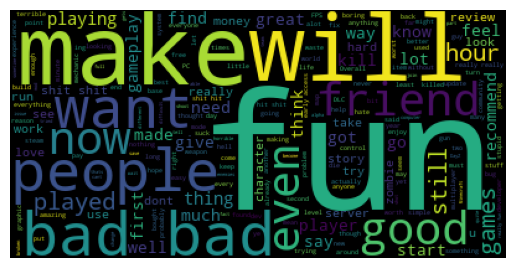

In [216]:
nube_negativa=WordCloud(stopwords=stop).generate(texto_neg)
plt.imshow(nube_negativa)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

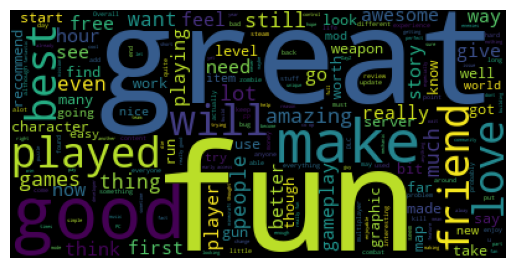

In [217]:
# Nube de palabras positivas
texto_positivo=''.join(positivos['review'])
nube_positiva=WordCloud(stopwords=stop).generate(texto_positivo)
plt.imshow(nube_positiva)
plt.axis('off')

In [218]:
# Seleccion de columnas importantes
funcion5_exportar=funcion5.loc[:,['item_id','id','year','sentiment_analysis']]
funcion5_exportar

,item_id,id,year,sentiment_analysis
0,1250,1250,2009.0,2
1,22200,22200,2009.0,2
2,22200,22200,2009.0,2
5,227300,227300,2013.0,0
6,227300,227300,2013.0,0
...,...,...,...,...
135041,273110,273110,2014.0,2
135042,273110,273110,2014.0,2
135043,730,730,2012.0,2
135044,440,440,2007.0,2


In [219]:
# Cambiar columna "year" a tipo entero
funcion5_exportar['year']=funcion5_exportar['year'].astype(int)

In [220]:
# Exportar df funcion 5 
funcion5_exportar.to_csv('funcion5.csv',index=False)